In [47]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import pearsonr

dataset_chromecast = pd.read_csv('dataset_chromecast.csv')
dataset_smarttv = pd.read_csv('dataset_smart-tv.csv')

dataset_chromecast['hour'] = dataset_chromecast['date_hour'].apply(lambda x: int(x.split(" ")[1].split(":")[0]))
dataset_chromecast['bytes_up'] = dataset_chromecast['bytes_up'].apply(lambda x: math.log(x, 10) if x != 0 else 0)
dataset_chromecast['bytes_down'] = dataset_chromecast['bytes_down'].apply(lambda x: math.log(x, 10) if x != 0 else 0)
dataset_smarttv['hour'] = dataset_smarttv['date_hour'].apply(lambda x: int(x.split(" ")[1].split(":")[0]))
dataset_smarttv['bytes_up'] = dataset_smarttv['bytes_up'].apply(lambda x: math.log(x, 10) if x != 0 else 0)
dataset_smarttv['bytes_down'] = dataset_smarttv['bytes_down'].apply(lambda x: math.log(x, 10) if x != 0 else 0)

DATASET_1 = dataset_chromecast[dataset_chromecast['hour'] == 23][['bytes_down']]
DATASET_2 = dataset_chromecast[dataset_chromecast['hour'] == 23][['bytes_up']]

DATASET_3 = dataset_smarttv[dataset_smarttv['hour'] == 20][['bytes_down']]
DATASET_4 = dataset_smarttv[dataset_smarttv['hour'] == 20][['bytes_up']]

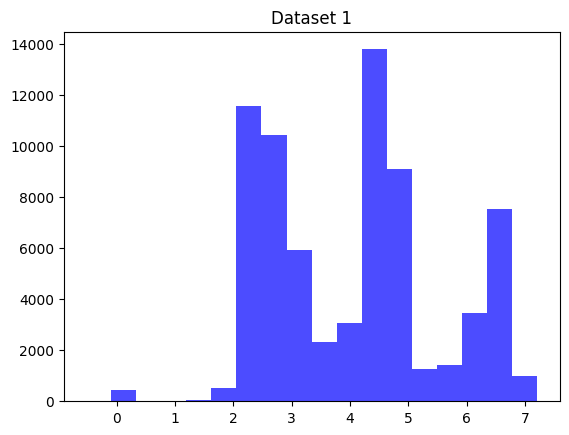

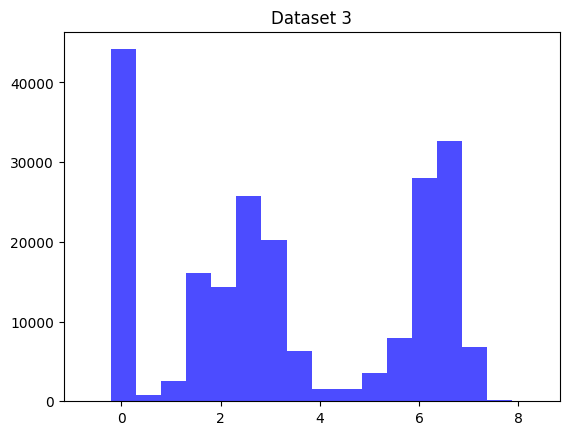

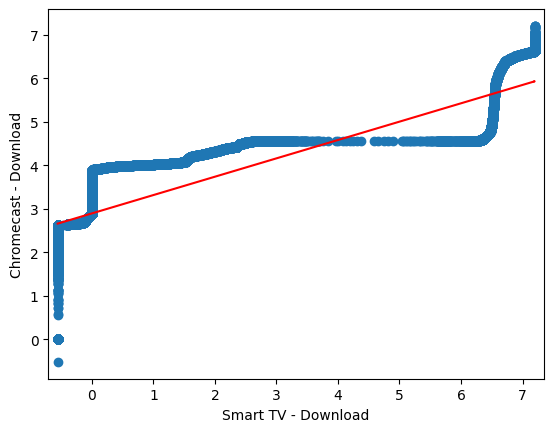

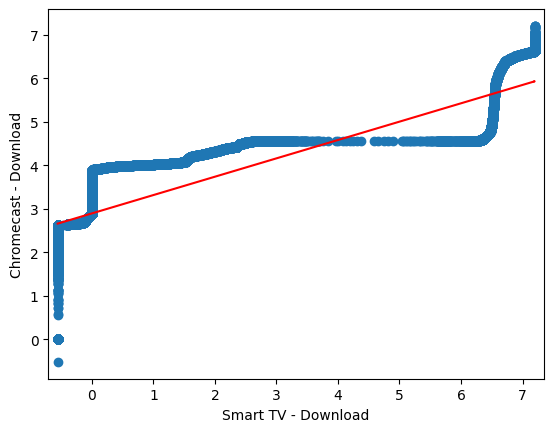

In [48]:
bins_dataset_1 = math.ceil(1 + 3.322 * math.log(DATASET_1.shape[0], 10))

plt.hist(DATASET_1, bins=bins_dataset_1, color='blue', alpha=0.7)
plt.title("Dataset 1")
plt.show()

bins_dataset_3 = math.ceil(1 + 3.322 * math.log(DATASET_2.shape[0], 10))

plt.hist(DATASET_3, bins=bins_dataset_3, color='blue', alpha=0.7)
plt.title("Dataset 3")
plt.show()

dataset_1_quantis = np.percentile(DATASET_1, np.arange(0, 100, 1))
dataset_3_quantis = np.percentile(DATASET_3, np.arange(0, 100, 1))

dataset_3_interp = np.interp(np.sort(DATASET_3), dataset_1_quantis, dataset_3_quantis)

qqplot_2samples(np.sort(DATASET_1, axis=0), dataset_3_interp, xlabel="Chromecast - Download", ylabel="Smart TV - Download", line='r')


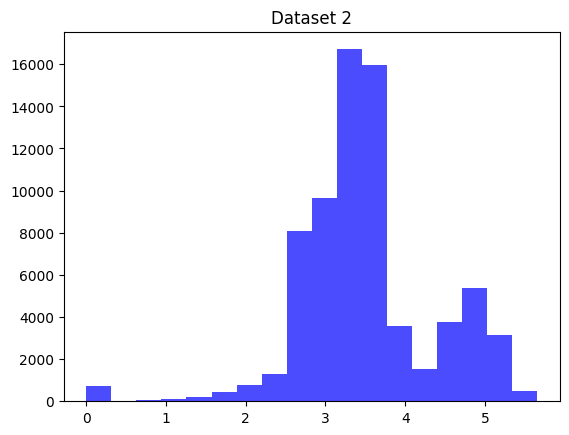

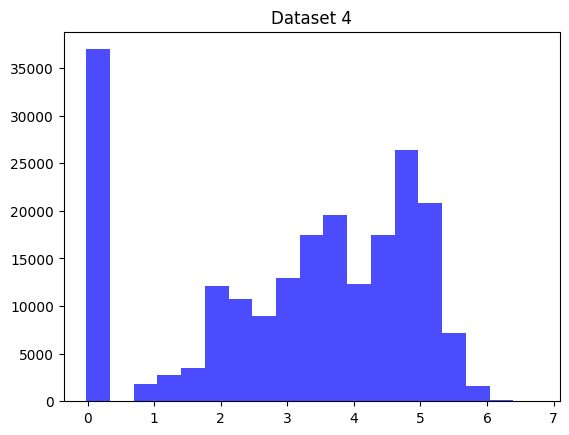

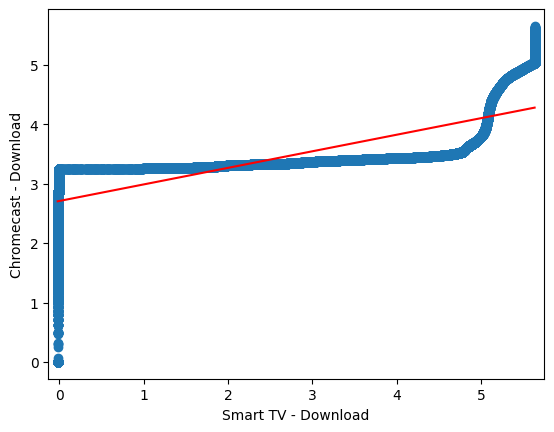

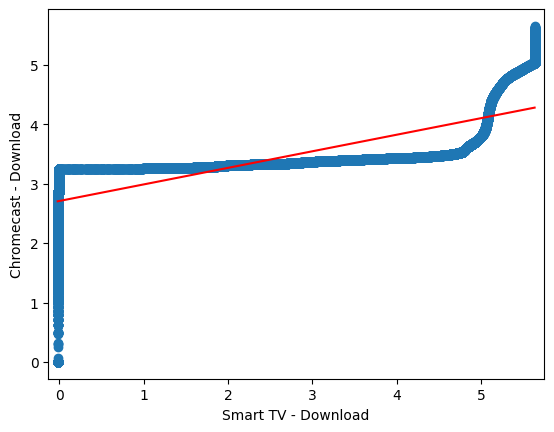

In [49]:
bins_dataset_2 = math.ceil(1 + 3.322 * math.log(DATASET_2.shape[0], 10))

plt.hist(DATASET_2, bins=bins_dataset_2, color='blue', alpha=0.7)
plt.title("Dataset 2")
plt.show()

bins_dataset_4 = math.ceil(1 + 3.322 * math.log(DATASET_4.shape[0], 10))

plt.hist(DATASET_4, bins=bins_dataset_4, color='blue', alpha=0.7)
plt.title("Dataset 4")
plt.show()

dataset_2_quantis = np.percentile(DATASET_2, np.arange(0, 100, 1))
dataset_4_quantis = np.percentile(DATASET_4, np.arange(0, 100, 1))

dataset_4_interp = np.interp(np.sort(DATASET_4), dataset_2_quantis, dataset_4_quantis)

qqplot_2samples(np.sort(DATASET_2, axis=0), dataset_4_interp, xlabel="Chromecast - Download", ylabel="Smart TV - Download", line='r')

(71848,)
(71848,)
Coeficiente de correlação:  0.7919586388345
P-value:  0.0


Text(0.5, 1.0, 'Scatterplot entre os Dataset 1 e 2')

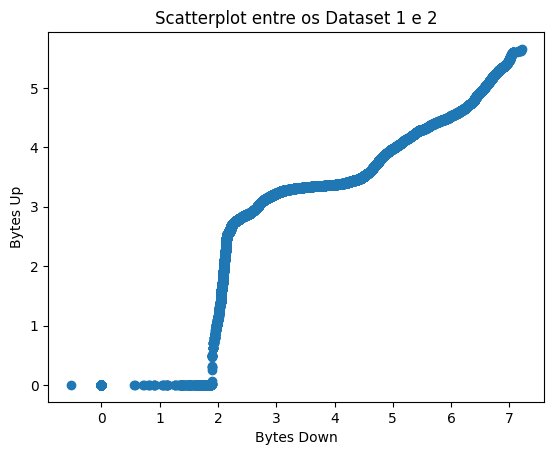

In [50]:
print(DATASET_1['bytes_down'].shape)
print(DATASET_2['bytes_up'].shape)

coeficiente, p_value = pearsonr(DATASET_1['bytes_down'], DATASET_2['bytes_up'])
print("Coeficiente de correlação: ", coeficiente)
print("P-value: ", p_value)

plt.scatter(np.sort(DATASET_1, axis=0), np.sort(DATASET_2, axis=0))
plt.xlabel("Bytes Down")
plt.ylabel("Bytes Up")
plt.title("Scatterplot entre os Dataset 1 e 2")

(212608,)
(212608,)
Coeficiente de correlação:  0.9154767447400127
P-value:  0.0


Text(0.5, 1.0, 'Scatterplot entre os Dataset 3 e 4')

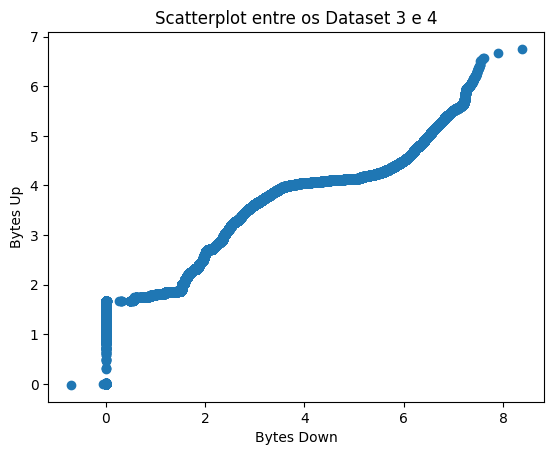

In [51]:
print(DATASET_3['bytes_down'].shape)
print(DATASET_4['bytes_up'].shape)

coeficiente, p_value = pearsonr(DATASET_3['bytes_down'], DATASET_4['bytes_up'])
print("Coeficiente de correlação: ", coeficiente)
print("P-value: ", p_value)

plt.scatter(np.sort(DATASET_3, axis=0), np.sort(DATASET_4, axis=0))
plt.xlabel("Bytes Down")
plt.ylabel("Bytes Up")
plt.title("Scatterplot entre os Dataset 3 e 4")